In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
import plotly
import plotly.express as px

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from sklearn.metrics import accuracy_score,mean_squared_error

import cufflinks as cf
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.size

4242

In [10]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#letusesomeVisualization

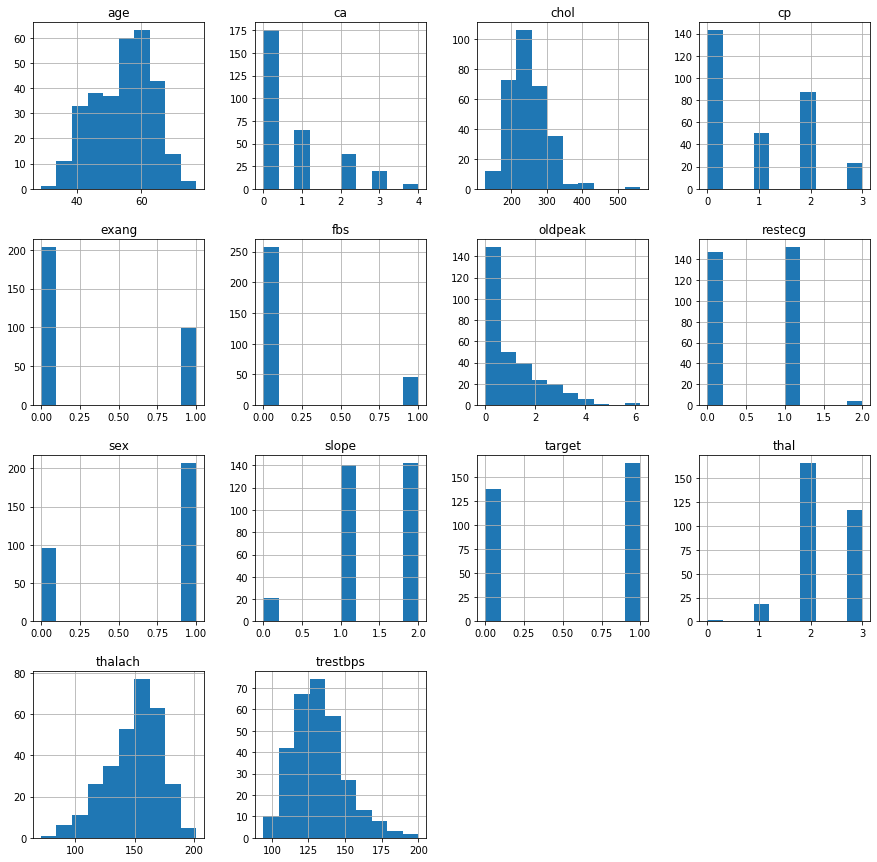

In [14]:
df.hist(figsize=(15,15)) #pandasvisualization but runs on top of matplotlib
plt.show()

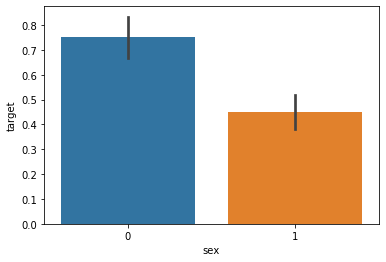

In [15]:
sns.barplot(df['sex'],df['target'])
plt.show()

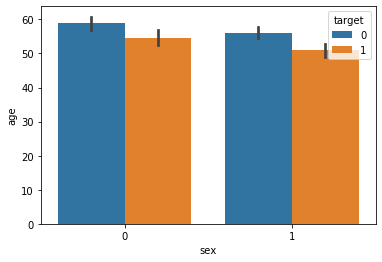

In [16]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

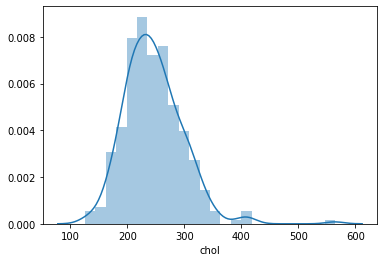

In [17]:
sns.distplot(df["chol"])
plt.show()

1    165
0    138
Name: target, dtype: int64


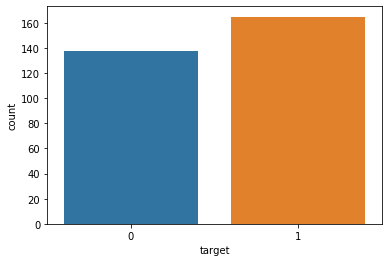

In [18]:
y = df["target"]

sns.countplot(y)

target_temp = df.target.value_counts()

print(target_temp)

In [19]:
numeric_columns=['age','trestbps','chol','oldpeak','thalach']

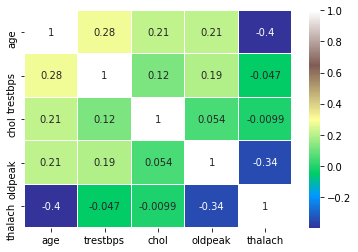

In [20]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)

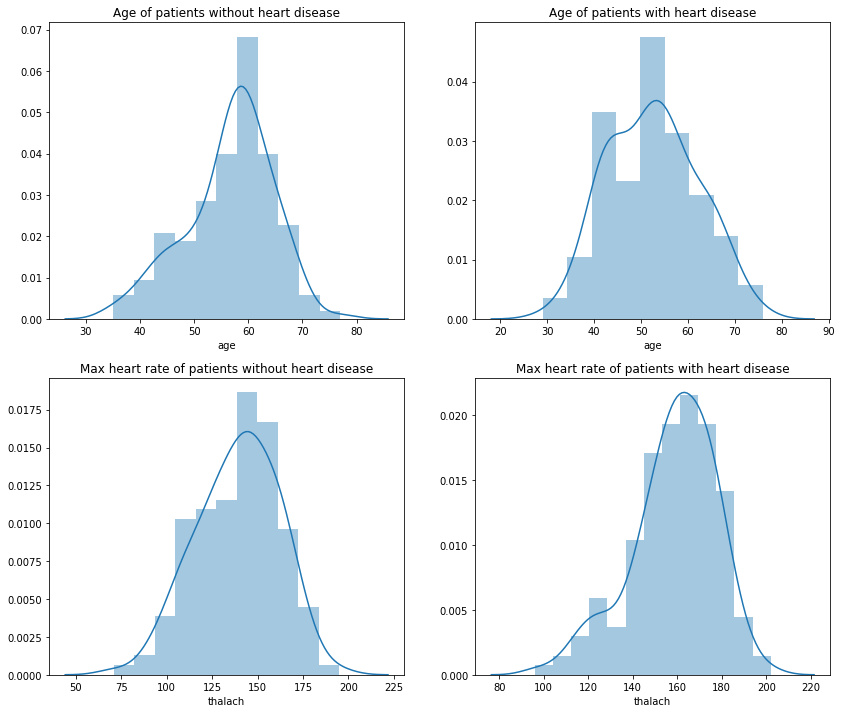

In [21]:
# create four distplots
plt.figure(figsize=(14,12))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [22]:
#datapreprocessing

In [23]:
x,y=df.loc[:,:'thal'],df['target']

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
df.shape

(303, 14)

In [27]:
x.shape

(303, 13)

In [28]:
y.shape

(303,)

In [29]:
y.size

303

In [30]:
x.size

3939

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [33]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [34]:
x_train.shape

(212, 13)

In [35]:
y_train

49     1
171    0
223    0
58     1
154    1
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 212, dtype: int64

In [36]:
y_train.shape

(212,)

In [37]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [38]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [39]:
x_test.shape

(91, 13)

In [40]:
y_test.shape

(91,)

In [41]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [44]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [45]:
prediction=dt.predict(x_test)

In [46]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [47]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [48]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [49]:
accuracy_dt

74.72527472527473

In [50]:
dt.feature_importances_

array([0.06844086, 0.0283698 , 0.33363884, 0.08491193, 0.08005242,
       0.        , 0.0129521 , 0.07427906, 0.04724994, 0.09577932,
       0.05635145, 0.10975468, 0.0082196 ])

In [51]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

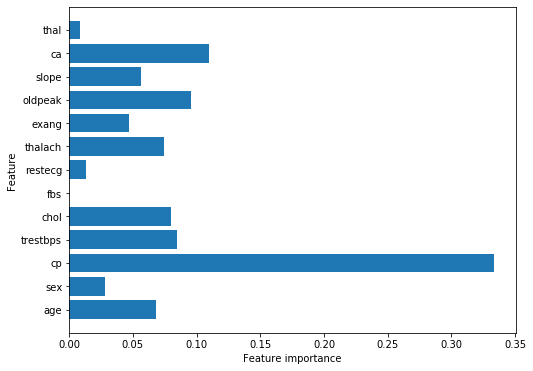

In [52]:
plot_feature_importances(dt)

In [53]:
Category=['No,You donot have Heart disease','Sorry ,You are having heart disease']

In [54]:
custom_data=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
custom_data_prediction_dt=dt.predict(custom_data)

In [55]:
custom_data_prediction_dt

array([1], dtype=int64)

In [56]:
print(Category[int(custom_data_prediction_dt)])

Sorry ,You are having heart disease


In [57]:
#knn

In [58]:
from sklearn.neighbors import KNeighborsClassifier



In [59]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler().fit(x)
x_std=std.transform(x)

In [60]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [61]:
x_train_std,x_test_std,y_train,y_test=train_test_split(x_std,y,random_state=10,test_size=0.3,shuffle=True)

In [62]:
x_train_std.shape

(212, 13)

In [63]:
k_range=range(1,45)
scores={}
h_score = 0     
best_k=0        
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 24 with score : 0.6263736263736264


In [64]:
scores

{1: 0.45054945054945056,
 2: 0.5824175824175825,
 3: 0.5164835164835165,
 4: 0.5164835164835165,
 5: 0.45054945054945056,
 6: 0.45054945054945056,
 7: 0.45054945054945056,
 8: 0.46153846153846156,
 9: 0.45054945054945056,
 10: 0.5934065934065934,
 11: 0.5384615384615384,
 12: 0.6043956043956044,
 13: 0.45054945054945056,
 14: 0.5824175824175825,
 15: 0.45054945054945056,
 16: 0.46153846153846156,
 17: 0.45054945054945056,
 18: 0.4725274725274725,
 19: 0.46153846153846156,
 20: 0.46153846153846156,
 21: 0.43956043956043955,
 22: 0.5384615384615384,
 23: 0.4725274725274725,
 24: 0.6263736263736264,
 25: 0.4945054945054945,
 26: 0.5274725274725275,
 27: 0.5274725274725275,
 28: 0.5494505494505495,
 29: 0.4945054945054945,
 30: 0.5054945054945055,
 31: 0.4725274725274725,
 32: 0.5054945054945055,
 33: 0.4725274725274725,
 34: 0.4725274725274725,
 35: 0.45054945054945056,
 36: 0.46153846153846156,
 37: 0.45054945054945056,
 38: 0.45054945054945056,
 39: 0.45054945054945056,
 40: 0.450549450

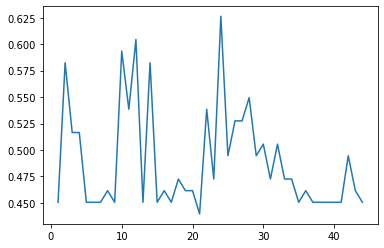

In [65]:
plt.plot(k_range,scores_list)

In [66]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_std,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [67]:
prediction_knn=knn.predict(x_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  78.02197802197803 %
mean_squared_error score :  21.978021978021978 %


In [68]:
Category=['No,You donot have Heart disease','Sorry ,You are having heart disease']

In [69]:
custom_data_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
custom_data_knn_std=std.transform(custom_data_knn)
custom_data_prediction_knn=knn.predict(custom_data_knn_std)

In [70]:
custom_data_prediction_knn

array([1], dtype=int64)

In [71]:
print(Category[int(custom_data_prediction_knn)])

Sorry ,You are having heart disease


In [72]:
from sklearn.svm import SVC

svc= SVC(C=2.0,kernel='rbf',gamma='auto').fit(x_train_std,y_train)
Y_predict = svc.predict(x_test_std)
accuracy_svc=accuracy_score(y_test,Y_predict)*100

In [73]:
print('Accuracy score : {}%'.format(accuracy_score(y_test,Y_predict)*100))

Accuracy score : 81.31868131868131%


In [74]:
custom_data_svc=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
custom_data_svc_std=std.transform(custom_data_svc)
custom_data_prediction_svc=svc.predict(custom_data_svc_std)

In [75]:
custom_data_prediction_svc

array([1], dtype=int64)

In [76]:
print(Category[int(custom_data_prediction_svc)])

Sorry ,You are having heart disease


In [77]:
from lightgbm import LGBMClassifier

lg=LGBMClassifier(boosting_type='gbdt',n_estimators=24,learning_rate=0.25,objective='binary',metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=20)
lg.fit(x_train,y_train)
yprid = lg.predict(x_test)
accuracy_lgbm=accuracy_score(y_test,yprid)*100


In [78]:
print('With score : ',accuracy_score(y_test,yprid)*100)

With score :  83.51648351648352


In [79]:
custom_data_lgbm=np.array([[61 ,1, 3,141,223,1,1,140,0,2.3,0,0,1]])
custom_data_prediction_lgbm=lg.predict(custom_data_lgbm)

In [80]:
custom_data_prediction_lgbm

array([1], dtype=int64)

In [81]:
print(Category[int(custom_data_prediction_lgbm)])

Sorry ,You are having heart disease


In [82]:
from sklearn.ensemble import RandomForestClassifier
ranm = RandomForestClassifier(n_estimators=100, bootstrap = True)
ranm.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
ranpr = ranm.predict(x_test)
accuracy_random=accuracy_score(y_test,ranpr)*100

In [84]:
print('With score : ',accuracy_random)

With score :  76.92307692307693


In [85]:
custom_data_random=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
custom_data_prediction_random=ranm.predict(custom_data_random)

In [86]:
custom_data_prediction_random

array([1], dtype=int64)

In [87]:
print(Category[int(custom_data_prediction_random)])

Sorry ,You are having heart disease


In [88]:
algorithms=['Decision Tree','KNN','SVC','LGBM','RANDOM FOREST']
scores=[accuracy_dt,accuracy_knn,accuracy_svc,accuracy_lgbm,accuracy_random]

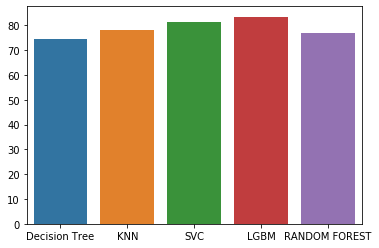

In [89]:
sns.barplot(algorithms,scores)
plt.show()